# Cleaning Data

In [28]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

## 1. Cleaning Governor's data

In [29]:
path = '/Users/angeles/Desktop/USA_elections/'
dfg = pd.read_csv(path + 'governors_by_state.csv')
dfg.head()

,State,Governor,Term,Party
0,Alabama,"William Wyatt Bibb October 2, 1781 – July 1...","November 9, 1819[b]–July 10, 1820[15](died in ...",Democratic-Republican\n
1,Alabama,"Thomas Bibb May 8, 1783 – September 20, 183...","July 10, 1820[g]–November 9, 1821(not candidat...",Democratic-Republican\n
2,Alabama,"Israel Pickens January 30, 1780 – April 24,...","November 9, 1821–November 25, 1825(term limite...",Democratic-Republican\n
3,Alabama,"John Murphy 1786 – September 21, 1841 (a...","November 25, 1825–November 25, 1829(term limit...",JacksonDemocrat\n
4,Alabama,"Gabriel Moore 1785 – June 9, 1845 (aged ...","November 25, 1829–March 3, 1831(resigned)[h]\n",JacksonDemocrat\n


<AxesSubplot:xlabel='State', ylabel='# governors'>

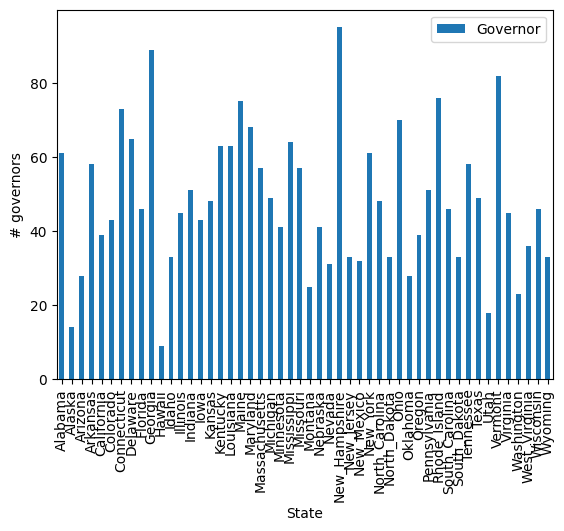

In [30]:
#dfg[['State','Governor']].groupby('State').count()
dfg[['State','Governor']].groupby('State').count().plot(kind='bar', xlabel='State', ylabel='# governors')

In [31]:
# Remove birth-death from "Name" column. 
months = ['January','February','March','April','May','June','July',\
                       'August ','September','October','November','December']
pattern = r'(\w*\.)|('+r'|'.join([r'{}'.format(w) for w in months])+r').*|\(.*|\d.*|\n'
dfg['Governor'].replace(to_replace=pattern, value='',regex=True, inplace=True)
# Remove "/n" or info inside "[]" from party column
dfg['Party'].replace(to_replace='\n|\[.*\]',value='',regex=True,inplace=True)

In [32]:
# 1. Separate the start-end term into two columns: Start Term and End Term. 
dfg[['Start Term', 'End Term']] = dfg['Term'].str.split('–|-', 1, expand=True)

# 2. Remove Term column.
dfg.drop(labels='Term', axis=1, inplace=True)

# 3. Then, clean up Start and End columns (remove unwanted parenthesis).
dfg['Start Term'].replace(to_replace=r'\(.*|\[.*|\n.*', value='', regex =True, inplace=True)
dfg['End Term'].replace(to_replace=r'\(.*|\[.*|\n.*', value='', regex =True, inplace=True)
dfg['End Term'].replace(to_replace=r'.*Incumbent.*|.*[pP]resent.*', value='January 1, 2023', regex =True, inplace=True)

# 4. Finally transform to real dates.
# transform dates from strings to datetime
terms = ['Start Term', 'End Term']
for term in terms:
    for i in range(len(dfg[term])):
        try:
            dfg[term].iloc[i] = pd.to_datetime(dfg[term].iloc[i]).date()
        except:
            print(i, term, ',Not a date,',  dfg[term].iloc[i], dfg['State'].iloc[i], dfg['Governor'].iloc[i])

dfg.head()

102 Start Term ,Not a date, Taking officeJanuary 2, 2023 Arizona Katie Hobbs 
160 Start Term ,Not a date, Taking officeJanuary 10, 2023 Arkansas Sarah Huckabee Sanders 
184 Start Term ,Not a date, John M. Eshleman California Hiram Johnson
524 Start Term ,Not a date, Taking officeDecember 5, 2022 Hawaii Josh Green 
1013 Start Term ,Not a date, Taking office January 18, 2023 Maryland Wes Moore 
1347 Start Term ,Not a date, Taking officeJanuary 12, 2023 Nebraska Jim Pillen 
1378 Start Term ,Not a date, Taking officeJanuary 2, 2023 Nevada Joe Lombardo 
1817 Start Term ,Not a date, Taking officeJanuary 9, 2023 Oregon Tina Kotek 
1868 Start Term ,Not a date, Taking officeJanuary 17, 2023 Pennsylvania Josh Shapiro 
102 End Term ,Not a date, None Arizona Katie Hobbs 
160 End Term ,Not a date, None Arkansas Sarah Huckabee Sanders 
184 End Term ,Not a date, None California Hiram Johnson
524 End Term ,Not a date, None Hawaii Josh Green 
1013 End Term ,Not a date, None Maryland Wes Moore 
1070 End

,State,Governor,Party,Start Term,End Term
0,Alabama,William Wyatt Bibb,Democratic-Republican,1819-11-09,1820-07-10
1,Alabama,Thomas Bibb,Democratic-Republican,1820-07-10,1821-11-09
2,Alabama,Israel Pickens,Democratic-Republican,1821-11-09,1825-11-25
3,Alabama,John Murphy,JacksonDemocrat,1825-11-25,1829-11-25
4,Alabama,Gabriel Moore,JacksonDemocrat,1829-11-25,1831-03-03


In [34]:
dfg.iloc[184]

State               California
Governor         Hiram Johnson
Party              Progressive
Start Term    John M. Eshleman
End Term                  None
Name: 184, dtype: object

Governor Hiram Johnson was from the Republican party during his term in office. However, he switched to Republican/Progressive in 1920.
We keep Hiram as Republican for simplicity and eliminate entry 184.

In [7]:
# # drop extra columns that didnt contain governors
# dfg.drop(labels=184, axis=0, inplace=True)
# dfg.drop(labels=1115, axis=0, inplace=True)
# dfg.drop(labels=2094, axis=0, inplace=True)
# dfg.reset_index(drop=True, inplace=True)

We cant pivot the table if there are any duplicates on the dates of Starting Term, since we want to use these dates as indices.

In [35]:
print(len(dfg[dfg[['State',  'Start Term']].duplicated()]))
dfg[dfg[['State',  'Start Term']].duplicated()]

4


,State,Governor,Party,Start Term,End Term
32,Alabama,William Samford,Democratic,1900-12-01,1901-06-11
834,Louisiana,William Pitt Kellogg,Republican,1873-01-13,1877-01-08
836,Louisiana,Francis Nicholls,Democratic,1877-01-08,1880-01-14
890,Maine,Hugh Anderson,Democratic,1844-01-03,1847-05-12


In [36]:
print(dfg.iloc[31],dfg.iloc[32])

State                    Alabama
Governor      William  Jelks    
Party                 Democratic
Start Term            1900-12-01
End Term              1900-12-26
Name: 31, dtype: object State                      Alabama
Governor      William  Samford    
Party                   Democratic
Start Term              1900-12-01
End Term                1901-06-11
Name: 32, dtype: object


In [10]:
print(dfg.iloc[834],dfg.iloc[833])

State                        Louisiana
Governor      William Pitt Kellogg    
Party                       Republican
Start Term                  1873-01-13
End Term                    1877-01-08
Name: 834, dtype: object State                Louisiana
Governor      John McEnery    
Party               Democratic
Start Term          1873-01-13
End Term            1873-05-22
Name: 833, dtype: object


In [11]:
print(dfg.iloc[836],dfg.iloc[835])


State                     Louisiana
Governor      Francis  Nicholls    
Party                    Democratic
Start Term               1877-01-08
End Term                 1880-01-14
Name: 836, dtype: object State                    Louisiana
Governor      Stephen  Packard    
Party                   Republican
Start Term              1877-01-08
End Term                1877-04-25
Name: 835, dtype: object


In [12]:
print(dfg.iloc[890],dfg.iloc[889])

State                      Maine
Governor      Hugh  Anderson    
Party                 Democratic
Start Term            1844-01-03
End Term              1847-05-12
Name: 890, dtype: object State                  Maine
Governor      John  Dana    
Party             Democratic
Start Term        1844-01-03
End Term          1844-01-03
Name: 889, dtype: object


Jhon Dana served as governor of Maine for only one day.  After Acting Governor David Dunn resigned from office. (source wikipedia).

William Jelks  he also served as acting governor of Alabama between December 1 and December 26, 1900 when Governor William J. Samford was out-of-state seeking medical treatment.

From wikipedia:
John McEnery (March 31, 1833, Petersburg, Virginia – March 28, 1891) was a Louisiana Democratic politician and lawyer who was considered by Democrats to be the winner of the highly contested 1872 election for Governor of Louisiana. After extended controversy over election results, the Republican candidate William Pitt Kellogg was certified. McEnery, who had been an officer in the Confederate States Army during the American Civil War, was not allowed to take office following a weighing in by the federal government and local Republicans loyal to President Ulysses S. Grant.

Stephen Bennett Packard Sr. (April 25, 1839 – January 31, 1922) was a Republican politician in Reconstruction-era Louisiana. He ran for governor in 1876 against Democratic opponent Francis T. Nicholls, and at the end of the election both candidates claimed victory, leaving the matter to be resolved by President Rutherford B. Hayes. He was the last Republican to serve as Governor of Louisiana until Dave Treen took office in 1980.



We remove these four governors from the data.

In [37]:
dfg.drop(index=[31,833,835,889, 184],inplace=True)
dfg.reset_index(inplace=True)

In [38]:
dfg['Start Term'] = dfg['Start Term'].astype(str)

In [39]:
dfg['Start Term']=dfg['Start Term'].str.replace(r'(^.*Taking.*$)', '2023-01-01')

/var/folders/h2/9t3ny3fn0hg9vrlqr03wl9sm0000gn/T/ipykernel_61678/4273177194.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dfg['Start Term']=dfg['Start Term'].str.replace(r'(^.*Taking.*$)', '2023-01-01')


In [16]:
#dfg['Start Term'].loc[dfg['Start Term'].str.contains('Taking', case=False), 'Start Term'] = '2023-01-01'

In [43]:
# for i in range(len(dfg['Start Term'])):
#     print(i,dfg['Start Term'][i])

In [41]:
bla = pd.pivot(dfg[['State', 'Party', 'Start Term']], index = 'Start Term', columns ='State', values='Party')

In [46]:
type(dfg.index)

pandas.core.indexes.range.RangeIndex

In [44]:
bla

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South_Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West_Virginia,Wisconsin,Wyoming
Start Term,,,,,,,,,,,,,,,,,,,,,
1775-11-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1776-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1776-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1776-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1777-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Republican,NaN,NaN,NaN,NaN


In [296]:
pd.to_datetime(bla.index).strftime('%Y-%m-%d')

ParserError: Unknown string format: Fielding L. WrightMay 16, 1895 

In [210]:
bla.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1811 entries, 1775-11-07 to Taking officeJanuary 9, 2023
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Alabama         60 non-null     object
 1   Alaska          14 non-null     object
 2   Arizona         28 non-null     object
 3   Arkansas        58 non-null     object
 4   California      38 non-null     object
 5   Colorado        43 non-null     object
 6   Connecticut     73 non-null     object
 7   Delaware        65 non-null     object
 8   Florida         46 non-null     object
 9   Georgia         89 non-null     object
 10  Hawaii          9 non-null      object
 11  Idaho           33 non-null     object
 12  Illinois        45 non-null     object
 13  Indiana         51 non-null     object
 14  Iowa            43 non-null     object
 15  Kansas          48 non-null     object
 16  Kentucky        63 non-null     object
 17  Louisiana       61 non-n

## 2. Cleaning Presidential Elections data

In [64]:
path = '/Users/angeles/Desktop/USA_elections/'
dfp = pd.read_csv(path + 'presidential_by_state.csv')
#dfp.drop(columns='Unnamed: 0',inplace=True)
dfp.head()

,State,1789,1792,1796,1800†,1804,1808,1812,1816,1820,...,1984,1988,1992,1996,2000‡,2004,2008,2012,2016‡,2020
0,Alabama\n,\n,\n,\n,\n,\n,\n,\n,\n,DR\n,...,R\n,R\n,R\n,R\n,R\n,R\n,R\n,R\n,R\n,R\n
1,Alaska\n,\n,\n,\n,\n,\n,\n,\n,\n,\n,...,R\n,R\n,R\n,R\n,R\n,R\n,R\n,R\n,R\n,R\n
2,Arizona\n,\n,\n,\n,\n,\n,\n,\n,\n,\n,...,R\n,R\n,R\n,D\n,R\n,R\n,R\n,R\n,R\n,D\n
3,Arkansas\n,\n,\n,\n,\n,\n,\n,\n,\n,\n,...,R\n,R\n,D\n,D\n,R\n,R\n,R\n,R\n,R\n,R\n
4,California\n,\n,\n,\n,\n,\n,\n,\n,\n,\n,...,R\n,R\n,D\n,D\n,D\n,D\n,D\n,D\n,D\n,D\n


In [65]:
dfp['State'].replace(to_replace=' ',value='_',regex=True,inplace=True)
dfp.replace(to_replace='\n',value='',regex=True,inplace=True)

In [66]:
dfp['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'D.C.', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'State',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New_Hampshire',
       'New_Jersey', 'New_Mexico', 'New_York', 'North_Carolina',
       'North_Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode_Island', 'South_Carolina', 'South_Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West_Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [67]:
dfp = dfp.set_index('State').T

In [78]:
dfp.index.unique()

Index(['1789', '1792', '1796', '1800†', '1804', '1808', '1812', '1816', '1820',
       '1824†', '1828', '1832', '1836', '1840', '1844', '1848', '1852', '1856',
       '1860', '1864', '1868', '1872', '1876‡', '1880', '1884', '1888‡',
       '1892', '1896', '1900', '1904', '1908', '1912', '1916', '1920', '1924',
       '1928', '1932', '1936', '1940', '1944', '1948', '1952', '1956', '1960',
       '1964', '1968', '1972', '1976', '1980', '1984', '1988', '1992', '1996',
       '2000‡', '2004', '2008', '2012', '2016‡', '2020'],
      dtype='object')

In [82]:
dfp.index = dfp.index.str.replace('†',"").str.replace('‡',"")

In [54]:
# rename columns to match governors df
# dfp.rename(columns={'Election Date':'Presidential Date','Party':'Presidential Result'},inplace=True)


In [97]:
dfp.drop(dfp[dfp['State']=='D.C.'].index,inplace=True)
dfp.drop(dfp[dfp['State']=='State'].index,inplace=True)

In [98]:
dfp.columns.unique()

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'D.C.', 'Florida', 'Georgia', 'Hawaii',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'State', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New_Hampshire', 'New_Jersey', 'New_Mexico', 'New_York',
       'North_Carolina', 'North_Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode_Island', 'South_Carolina', 'South_Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West_Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='State')

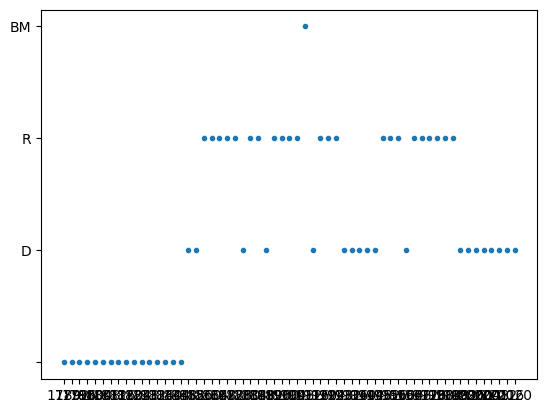

In [87]:
plt.plot(dfp['California'],'.')

## 3. Cleaning Senator's data

In [13]:
df = pd.read_csv('senators_by_state.csv')

In [14]:
# removeunwanted "\n" substring
df.replace(to_replace=r'\n', value='', regex=True,inplace=True)

df.index = df.index.str.replace(r'\n', '', regex=True)
df.reset_index(inplace=True)

/var/folders/h2/9t3ny3fn0hg9vrlqr03wl9sm0000gn/T/ipykernel_25114/2520791695.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)


In [15]:
df.head()

,index,1789,1789.1,1789.2,1790,1792,1794,1796,1798,1800,...,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
0,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,R,—,R,R,—,R,R,—,R
1,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,R,—,D,R,—,R,R,—,R
2,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,—,R,R,—,R,R,—,R,D,—
3,Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,D,—,D,R,—,R,R,—,R,NaN
4,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,D,D,—,D,D,—,D,D,—,NaN


In [16]:
df.rename(columns={'index':'State'})

,State,1789,1789.1,1789.2,1790,1792,1794,1796,1798,1800,...,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
0,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,R,—,R,R,—,R,R,—,R
1,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,R,—,D,R,—,R,R,—,R
2,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,—,R,R,—,R,R,—,R,D,—
3,Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,D,—,D,R,—,R,R,—,R,NaN
4,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,D,D,—,D,D,—,D,D,—,NaN
5,Colorado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,D,—,D,D,—,R,D,—,D
6,Connecticut,PA,—,PA,PA,—,F,F,—,F,...,—,D,I,—,D,D,—,D,D,—
7,Delaware,PA,AA,—,PA,PA,—,F,F,—,...,D,—,D,D,—,D,D,—,D,D
8,Florida,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,D,—,R,D,—,R,R,—,NaN
9,Georgia,—,AA,AA,—,AA,F,—,DR,DR,...,R,R,—,R,R,—,R,R,—,D


In [17]:
df.index

RangeIndex(start=0, stop=50, step=1)

# Plotting

In [18]:
# let's do some plotting
def func(x):
    if x == 'D':
        y = 1
    elif x == 'R':
        y = 2
    else:
        y = 0
    return(y)

dfp['Presidential Result'] = dfp[['Presidential Result']].applymap(func)

In [19]:
# let's do some plotting
def func(x):
    if x == 'Democrat' or x == 'Democratic':
        y = 1
    elif x == 'Republican':
        y = 2
    else:
        y = 0
    return(y)

dfg['Party'] = dfg[['Party']].applymap(func)

In [20]:
dfg[dfg['State']=='Wisconsin']

,State,Governor,Party,Start Term,End Term
2324,Wisconsin,Nelson Dewey,1,1848-06-07,1852-01-05
2325,Wisconsin,Leonard Farwell,0,1852-01-05,1854-01-02
2326,Wisconsin,William Barstow,1,1854-01-02,1856-03-21
2327,Wisconsin,Arthur MacArthur,1,1856-03-21,1856-03-25
2328,Wisconsin,Coles Bashford,2,1856-03-25,1858-01-04
2329,Wisconsin,Alexander Randall,2,1858-01-04,1862-01-06
2330,Wisconsin,Louis Harvey,2,1862-01-06,1862-04-19
2331,Wisconsin,Edward Salomon,2,1862-04-19,1864-01-04
2332,Wisconsin,James Lewis,2,1864-01-04,1866-01-01
2333,Wisconsin,Lucius Fairchild,2,1866-01-01,1872-01-01


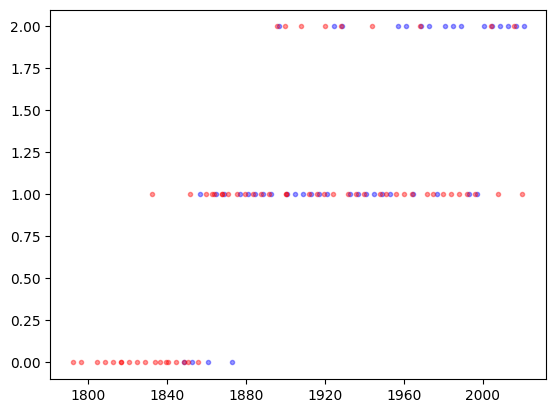

In [21]:
# states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
#         'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
#         'Hawaii','Idaho', 'Illinois', 'Indiana', 'Iowa',
#         'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
#         'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
#         'Montana', 'Nebraska', 'Nevada', 'New_Hampshire', 'New_Jersey',
#         'New_Mexico', 'New_York', 'North_Carolina', 'North_Dakota', 'Ohio',
#         'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode_Island', 'South_Carolina',
#         'South_Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
#         'Virginia', 'Washington', 'West_Virginia', 'Wisconsin', 'Wyoming']
state = 'Kentucky'  
result = dfp[dfp['State']==state]['Presidential Result']
dates = pd.to_datetime(dfp[dfp['State']==state]['Presidential Date'])
resultg = dfg[dfg['State']==state]['Party']
datesg = pd.to_datetime(dfg[dfg['State']==state]['Start Term'])
plt.plot(dates, result,'.b',alpha=0.4)
plt.plot(datesg, resultg,'.r',alpha=0.4)

## 3. Adding presindetial elections to the governor's table

In [22]:
# add presindetial columns to governor's df
dfg['Presidential Date'] = 'NaN'

In [23]:
dfg[dfg['State']=='Missouri'].iloc[1]

State                           Missouri
Governor             Frederick Bates    
Party                                  0
Start Term                    1824-11-15
End Term                      1825-08-04
Presidential Date                    NaN
Name: 1219, dtype: object

In [24]:
dfp['Presidential Date'].iloc[20]

'1868-11-03'

In [25]:
def find_closest(date_gov, dates_presi):
    delta_0 = pd.Timedelta("0 days")
    deltas = date_gov - dates_presi
    deltas = deltas[deltas >= delta_0]
    min_delta = np.argmin(deltas)
    return min_delta
    

In [26]:
dell = dfg[dfg['State']=='California']['Start Term'].iloc[10]-dfp[dfp['State']=='California']['Presidential Date']

TypeError: unsupported operand type(s) for -: 'datetime.date' and 'str'

In [ ]:
 dfg[dfg['State']=='California']['Start Term'].iloc[10]

In [ ]:
 dfg[dfg['State']=='California']

In [27]:
dfp[dfp['State']=='California']['Presidential Date']

236           NaN
237           NaN
238           NaN
239           NaN
240           NaN
241           NaN
242           NaN
243           NaN
244           NaN
245           NaN
246           NaN
247           NaN
248           NaN
249           NaN
250           NaN
251    1848-11-07
252    1852-11-02
253    1856-11-04
254    1860-11-06
255    1864-11-08
256    1868-11-03
257    1872-11-05
258    1876-11-07
259    1880-11-02
260    1884-11-04
261    1888-11-06
262    1892-11-08
263    1896-11-03
264    1900-11-06
265    1904-11-08
266    1908-11-03
267    1912-11-05
268    1916-11-07
269    1920-11-02
270    1924-11-04
271    1928-11-06
272    1932-11-08
273    1936-11-03
274    1940-11-05
275    1944-11-07
276    1948-11-02
277    1952-11-04
278    1956-11-06
279    1960-11-08
280    1964-11-03
281    1968-11-05
282    1972-11-07
283    1976-11-02
284    1980-11-04
285    1984-11-06
286    1988-11-08
287    1992-11-03
288    1996-11-05
289    2000-11-07
290    2004-11-02
291    200

In [28]:
dell = dell[dell >= delta_0]

NameError: name 'dell' is not defined

In [29]:
idx = dell.index[dell == np.min(dell)][0]

NameError: name 'dell' is not defined

In [30]:
dfp[dfp['State']=='California']['Presidential Date'].loc[idx]

NameError: name 'idx' is not defined

In [31]:
df1 = dfg[dfg['State']=='California']['Start Term'].apply(find_closest,dates_presi=dfp[dfp['State']=='California']['Presidential Date'])

TypeError: unsupported operand type(s) for -: 'datetime.date' and 'str'

In [ ]:
dfp['Presidential Date']

In [33]:
states=['Missouri']
for i in range(len(dfg[dfg['State']==state])):
    for date in dfp[dfp['State']==state]['Presidential Date']:
   # for date in dfp[dfp['State']==state]['Presidential Date']:
        
    
#         date_presi = pd.to_datetime(date).date()
#         print(date_presi)
        try:
            mask=(date_presi >= dfg[dfg['State']==state]['Start Term'])&(date_presi <= dfg[dfg['State']==state]['End Term'])
            print(date_presi,mask[mask==True])
            print(dfg.at[mask[mask].index.values[0], 'Presidential Date'])
            dfg.at[mask[mask].index.values[0], 'Presidential Date']= date_presi
        except:
            pass

In [34]:
# states=['Missouri']
# for state in states:
#     for date in dfp[dfp['State']==state]['Presidential Date']:
#         date_presi = pd.to_datetime(date).date()
#         print(date_presi)
#         try:
#             mask=(date_presi >= dfg[dfg['State']==state]['Start Term'])&(date_presi <= dfg[dfg['State']==state]['End Term'])
#             print(date_presi,mask[mask==True])
#             print(dfg.at[mask[mask].index.values[0], 'Presidential Date'])
#             dfg.at[mask[mask].index.values[0], 'Presidential Date']= date_presi
#         except:
#             pass

In [35]:
# # for each state add the presidential election date
# states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
#         'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
#         'Hawaii','Idaho', 'Illinois', 'Indiana', 'Iowa',
#         'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
#         'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
#         'Montana', 'Nebraska', 'Nevada', 'New_Hampshire', 'New_Jersey',
#         'New_Mexico', 'New_York', 'North_Carolina', 'North_Dakota', 'Ohio',
#         'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode_Island', 'South_Carolina',
#         'South_Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
#         'Virginia', 'Washington', 'West_Virginia', 'Wisconsin', 'Wyoming']

# for state in states:
#     for date in dfp[dfp['State']==state]['Presidential Date']:
        
#         date_presi = pd.to_datetime(date).date()
#         try:
#             mask=(date_presi >= dfg[dfg['State']==state]['Start Term'])&(date_presi <= dfg[dfg['State']==state]['End Term'])

#             dfg.at[mask[mask].index.values[0], 'Presidential Date']= date_presi
#         except:
#             pass

In [36]:
dfg[dfg['State']=='Missouri']

,State,Governor,Party,Start Term,End Term,Presidential Date
1218,Missouri,Alexander McNair,0,1820-09-18,1824-11-15,NaN
1219,Missouri,Frederick Bates,0,1824-11-15,1825-08-04,NaN
1220,Missouri,Abraham Williams,0,1825-08-04,1826-01-20,NaN
1221,Missouri,John Miller,1,1826-01-20,1832-11-19,NaN
1222,Missouri,Daniel Dunklin,1,1832-11-19,1836-09-30,NaN
1223,Missouri,Lilburn Boggs,1,1836-09-30,1840-11-16,NaN
1224,Missouri,Thomas Reynolds,1,1840-11-16,1844-02-09,NaN
1225,Missouri,Meredith Miles Marmaduke,1,1844-02-09,1844-11-20,NaN
1226,Missouri,John Edwards,1,1844-11-20,1848-11-20,NaN
1227,Missouri,Austin Augustus King,1,1848-11-20,1853-01-03,NaN


In [37]:
dfp[dfp['Presidential Date'] == pd.NaT] =  pd.to_datetime('1700-1-1').date()

In [38]:
dfp['Presidential Date'].fillna(pd.to_datetime('1700-1-1').date())

0       1700-01-01
1       1700-01-01
2       1700-01-01
3       1700-01-01
4       1700-01-01
           ...    
3063    2004-11-02
3064    2008-11-04
3065    2012-11-06
3066    2016-11-08
3067    2020-11-03
Name: Presidential Date, Length: 2950, dtype: object

In [39]:
pd.NaT

NaT

In [40]:
# merge the two dataframes
dfm = pd.merge(dfg, dfp[['State','Presidential Date','Presidential Result']], how='left', on=['State','Presidential Date'])

In [41]:
dfm[dfm['State']=='New_York']

,State,Governor,Party,Start Term,End Term,Presidential Date,Presidential Result
1531,New_York,George Clinton,0,1777-07-30,1795-06-30,NaN,NaN
1532,New_York,John Jay,0,1795-07-01,1801-06-30,NaN,NaN
1533,New_York,George Clinton,0,1801-07-01,1804-06-30,NaN,NaN
1534,New_York,Morgan Lewis,0,1804-07-01,1807-06-30,NaN,NaN
1535,New_York,Daniel Tompkins,0,1807-07-01,1817-02-24,NaN,NaN
...,...,...,...,...,...,...,...
1587,New_York,George Pataki,2,1995-01-01,2006-12-31,NaN,NaN
1588,New_York,Eliot Spitzer,1,2007-01-01,2008-03-17,NaN,NaN
1589,New_York,David Paterson,1,2008-03-17,2010-12-31,NaN,NaN
1590,New_York,Andrew Cuomo,1,2011-01-01,2021-08-23,NaN,NaN


In [42]:
dfm['Presidential Date'].unique()

array(['NaN'], dtype=object)

In [43]:
dfm['Presidential Date'][dfm['Presidential Date']=='NaN'] = pd.to_datetime('1700-1-1').date()

/var/folders/h2/9t3ny3fn0hg9vrlqr03wl9sm0000gn/T/ipykernel_25114/2019042571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm['Presidential Date'][dfm['Presidential Date']=='NaN'] = pd.to_datetime('1700-1-1').date()


In [44]:
dfm

,State,Governor,Party,Start Term,End Term,Presidential Date,Presidential Result
0,Alabama,William Wyatt Bibb,0,1819-11-09,1820-07-10,1700-01-01,NaN
1,Alabama,Thomas Bibb,0,1820-07-10,1821-11-09,1700-01-01,NaN
2,Alabama,Israel Pickens,0,1821-11-09,1825-11-25,1700-01-01,NaN
3,Alabama,John Murphy,0,1825-11-25,1829-11-25,1700-01-01,NaN
4,Alabama,Gabriel Moore,0,1829-11-25,1831-03-03,1700-01-01,NaN
...,...,...,...,...,...,...,...
2398,Wyoming,Mike Sullivan,1,1987-01-05,1995-01-02,1700-01-01,NaN
2399,Wyoming,Jim Geringer,2,1995-01-02,2003-01-06,1700-01-01,NaN
2400,Wyoming,Dave Freudenthal,1,2003-01-06,2011-01-03,1700-01-01,NaN
2401,Wyoming,Matt Mead,2,2011-01-03,2019-01-07,1700-01-01,NaN


In [45]:
dfm_1900 = dfm[dfm['Presidential Date'] >= pd.to_datetime('1900-11-6').date()]

In [46]:
len(dfm_1900[(dfm_1900['Party']=='Republican') & (dfm_1900['Presidential Result']=='R')])

0

In [47]:
len(dfm_1900[(dfm_1900['Party']=='Republican') & (dfm_1900['Presidential Result']=='D')])

0

In [48]:
len(dfm_1900[(dfm_1900['Party']=='Democratic') & (dfm_1900['Presidential Result']=='D')])

0

In [49]:
len(dfm_1900[(dfm_1900['Party']=='Democratic') & (dfm_1900['Presidential Result']=='R')])

0

In [50]:
len(dfm_1900[(dfm_1900['Party']=='Republican')])

0

In [51]:
len(dfm_1900[(dfm_1900['Party']=='Democratic')])

0

In [52]:
346+134

480

In [53]:
dfm_1900['Presidential Date'].unique()

array([], dtype=object)

In [54]:
# if in the mayority of states the governors are republican, a republican wins elections?

len(dfm_1900[(dfm_1900['Presidential Date']==pd.to_datetime('2012-11-06').date())])

0

In [55]:
dfm_1900[(dfm_1900['Presidential Date']==pd.to_datetime('2012-11-06').date())]

,State,Governor,Party,Start Term,End Term,Presidential Date,Presidential Result


In [56]:
dfm[dfm['State']=='Missouri']

,State,Governor,Party,Start Term,End Term,Presidential Date,Presidential Result
1218,Missouri,Alexander McNair,0,1820-09-18,1824-11-15,1700-01-01,NaN
1219,Missouri,Frederick Bates,0,1824-11-15,1825-08-04,1700-01-01,NaN
1220,Missouri,Abraham Williams,0,1825-08-04,1826-01-20,1700-01-01,NaN
1221,Missouri,John Miller,1,1826-01-20,1832-11-19,1700-01-01,NaN
1222,Missouri,Daniel Dunklin,1,1832-11-19,1836-09-30,1700-01-01,NaN
1223,Missouri,Lilburn Boggs,1,1836-09-30,1840-11-16,1700-01-01,NaN
1224,Missouri,Thomas Reynolds,1,1840-11-16,1844-02-09,1700-01-01,NaN
1225,Missouri,Meredith Miles Marmaduke,1,1844-02-09,1844-11-20,1700-01-01,NaN
1226,Missouri,John Edwards,1,1844-11-20,1848-11-20,1700-01-01,NaN
1227,Missouri,Austin Augustus King,1,1848-11-20,1853-01-03,1700-01-01,NaN


In [32]:
# # convert presidential date column from string to datetime, to match the governors
# for i in range(len(dfp['Presidential Date'])):
#     try:
#         dfp['Presidential Date'].iloc[i] = pd.to_datetime(dfp['Presidential Date'].iloc[i]).date()
#     except:
#         dfp['Presidential Date'].iloc[i] = pd.to_datetime('1700-1-1').date()
# dfp['Presidential Date'].fillna(pd.to_datetime('1700-1-1').date(),inplace=True)

/var/folders/h2/9t3ny3fn0hg9vrlqr03wl9sm0000gn/T/ipykernel_25114/2097684875.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp['Presidential Date'].iloc[i] = pd.to_datetime(dfp['Presidential Date'].iloc[i]).date()
